In [1]:
import pandas as pd
url_dados =  "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url_dados)
dados


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [2]:
dados.head()


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [4]:
dados['Valor'][0].split()

['R$', '7.000.000']

In [5]:
dados["Valor"].str.split(expand= True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [6]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [7]:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()

array([None], dtype=object)

In [8]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [9]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [10]:
dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

C:\Users\Eduarda\AppData\Local\Temp\ipykernel_10040\3144433095.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [11]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

C:\Users\Eduarda\AppData\Local\Temp\ipykernel_10040\3338901845.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)
C:\Users\Eduarda\AppData\Local\Temp\ipykernel_10040\3338901845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)


In [12]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


<AxesSubplot:ylabel='Frequency'>

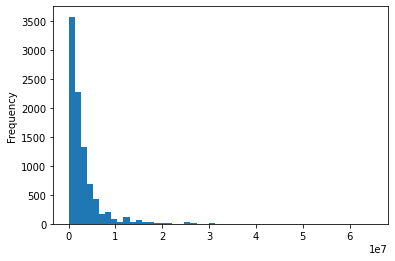

In [13]:
dados_vendas["Valor_anuncio_float"].plot.hist(bins = 50)

In [14]:
pd.set_option("display.precision", 2)
dados_vendas.describe(include= "all")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9.16e+03
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3.05e+06
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3.94e+06
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,1.30e+04
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,8.90e+05
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1.80e+06
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3.50e+06


In [15]:
dados_vendas[['Rua', 'Bairro', 'Cidade']].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


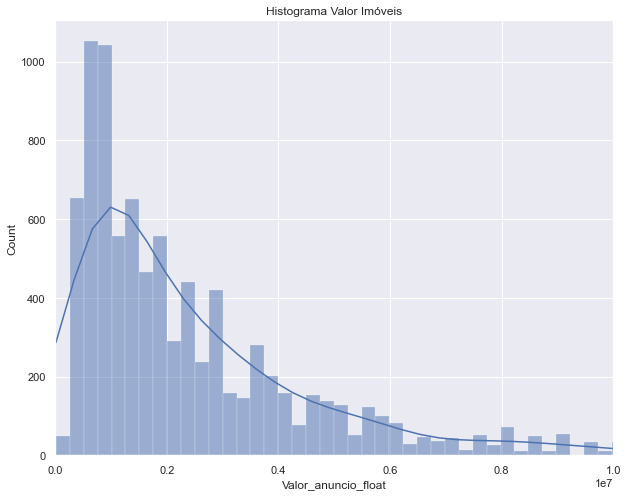

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float",kde = True)
ax.set_title("Histograma Valor Imóveis")
plt.xlim(-50, 10000000)
plt.show()

In [17]:
#DESAFIO AULA 2
# .Criar uma escala de valores em milhões
# .Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
# .Preço do metro quadrado por bairro e plotar em um gráfico ideal
# .Explorar as bibliotecas de visualizações e colocar as suas conclusão
# .Pesquisar um visualização para analisar os quartis, mediana e outliers


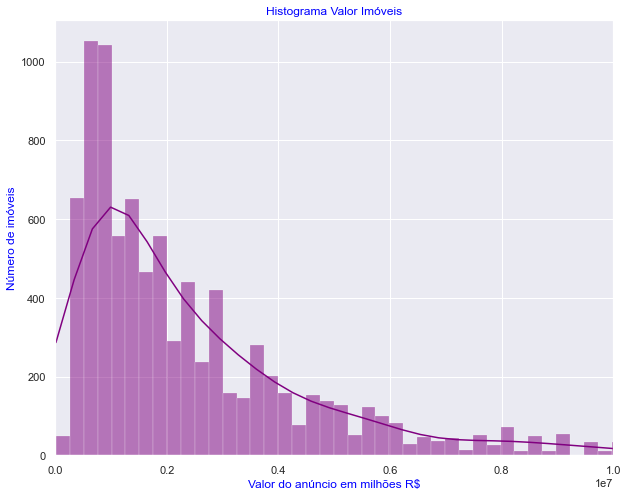

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True, color='purple')
ax.set_title('Histograma Valor Imóveis'.format("Histograma Valor Imóveis"), color='blue')
plt.xlim(-50, 10000000)
plt.xlabel("Valor do anúncio em milhões R$", color='blue')
plt.ylabel("Número de imóveis", color='blue')
plt.show()



In [19]:
dados_vendas["m_quad"] = (dados_vendas['Valor_anuncio_float'])/dados['Metragem']
dados_vendas.describe()
dados_vendas.head()

C:\Users\Eduarda\AppData\Local\Temp\ipykernel_10040\2554964114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["m_quad"] = (dados_vendas['Valor_anuncio_float'])/dados['Metragem']


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,m_quad
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7.00e+06,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3.70e+06,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,3.80e+05,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,6.85e+05,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,5.40e+05,5400.00


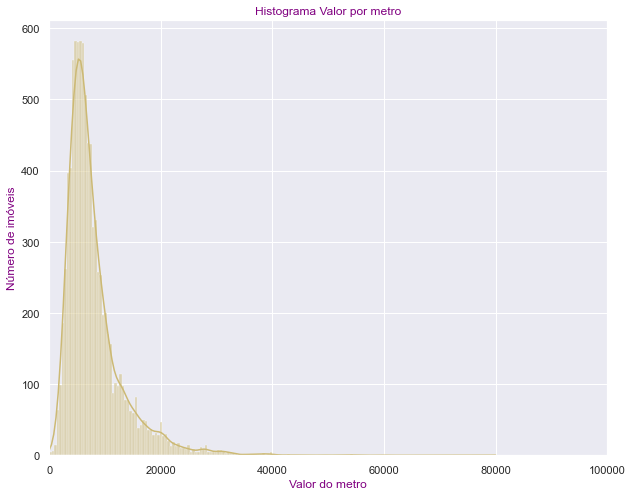

In [20]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "m_quad", kde = True, color='y')
ax.set_title('Histograma Valor por metro'.format("Histograma por metro"), color='purple')
plt.xlim(-1, 100000)
plt.xlabel("Valor do metro", color='purple')
plt.ylabel("Número de imóveis", color='purple')
plt.show()

In [21]:
dados_bairro = dados_vendas.groupby("Bairro").sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,m_quad
Bairro,,,,,,
Aclimação,19447,258,240,230,1.39e+08,6.05e+05
Alto da Boa Vista,3351,33,41,37,1.91e+07,4.68e+04
Alto da Lapa,23940,252,308,320,1.67e+08,6.09e+05
Alto da Mooca,5401,66,52,73,2.37e+07,1.14e+05
Alto de Pinheiros,158616,1453,1782,1827,1.76e+09,4.16e+06
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3.26e+06,2.23e+04
Água Branca,2083,37,39,27,1.47e+07,8.72e+04
Água Fria,1985,34,41,30,1.11e+07,7.01e+04


In [22]:
dados_bairro["Valor_m2_bairro"] = dados_bairro["Valor_anuncio_float"]/dados_bairro["Metragem"]
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,m_quad,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,1.39e+08,6.05e+05,7162.69
Alto da Boa Vista,3351,33,41,37,1.91e+07,4.68e+04,5708.74
Alto da Lapa,23940,252,308,320,1.67e+08,6.09e+05,6961.30
Alto da Mooca,5401,66,52,73,2.37e+07,1.14e+05,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1.76e+09,4.16e+06,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3.26e+06,2.23e+04,4283.84
Água Branca,2083,37,39,27,1.47e+07,8.72e+04,7065.77
Água Fria,1985,34,41,30,1.11e+07,7.01e+04,5604.53


In [23]:
dados_vendas.groupby("Bairro").mean().loc["Vila Mariana"]

Metragem               2.31e+02
Quartos                3.39e+00
Banheiros              3.24e+00
Vagas                  2.95e+00
Valor_anuncio_float    1.77e+06
m_quad                 7.91e+03
Name: Vila Mariana, dtype: float64

In [24]:
dados_bairro.loc["Vila Mariana"]

Metragem               3.91e+04
Quartos                5.73e+02
Banheiros              5.47e+02
Vagas                  4.99e+02
Valor_anuncio_float    2.99e+08
m_quad                 1.34e+06
Valor_m2_bairro        7.66e+03
Name: Vila Mariana, dtype: float64

In [25]:
dados_bairro["Valor_m2_bairro"]["Vila Mariana"]

7659.510222881855

In [26]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index

In [27]:
dados_bairro.reset_index(inplace= True)
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,m_quad,Valor_m2_bairro
0,Aclimação,19447,258,240,230,1.39e+08,6.05e+05,7162.69
1,Alto da Boa Vista,3351,33,41,37,1.91e+07,4.68e+04,5708.74
2,Alto da Lapa,23940,252,308,320,1.67e+08,6.09e+05,6961.30
3,Alto da Mooca,5401,66,52,73,2.37e+07,1.14e+05,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1.76e+09,4.16e+06,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3.26e+06,2.23e+04,4283.84
693,Água Branca,2083,37,39,27,1.47e+07,8.72e+04,7065.77
694,Água Fria,1985,34,41,30,1.11e+07,7.01e+04,5604.53
695,Água Funda,278,6,5,4,1.09e+06,7.75e+03,3920.86


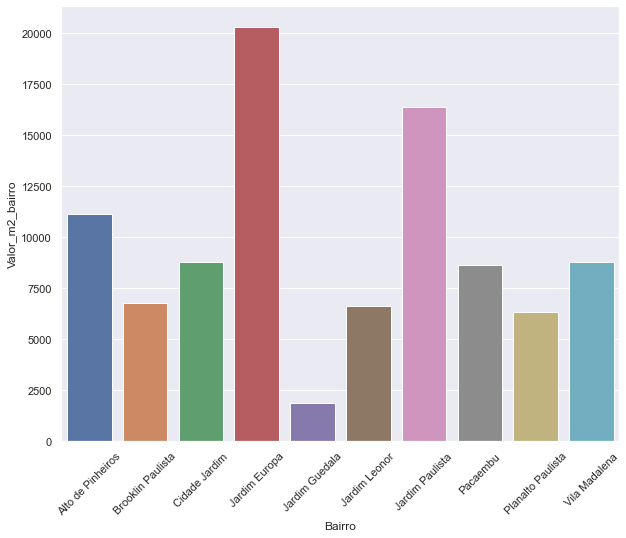

In [28]:
plt.figure(figsize=(10, 8))
ax= sns.barplot(x="Bairro", y="Valor_m2_bairro", data=dados_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis='x', rotation=45)

In [29]:
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,m_quad,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1.76e+09,4.16e+06,11126.34
19,Brooklin Paulista,70002,778,862,832,4.76e+08,1.63e+06,6796.90
57,Cidade Jardim,132220,789,1008,1172,1.16e+09,1.64e+06,8805.10
155,Jardim Europa,118898,795,993,1056,2.41e+09,4.19e+06,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1.80e+09,2.83e+06,1852.65
187,Jardim Leonor,97141,697,941,902,6.46e+08,1.12e+06,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2.14e+09,4.28e+06,16395.70
338,Pacaembu,100285,774,889,1028,8.68e+08,1.75e+06,8654.90
396,Planalto Paulista,59250,636,768,713,3.75e+08,1.19e+06,6327.54
564,Vila Madalena,66250,739,786,712,5.83e+08,1.79e+06,8803.82


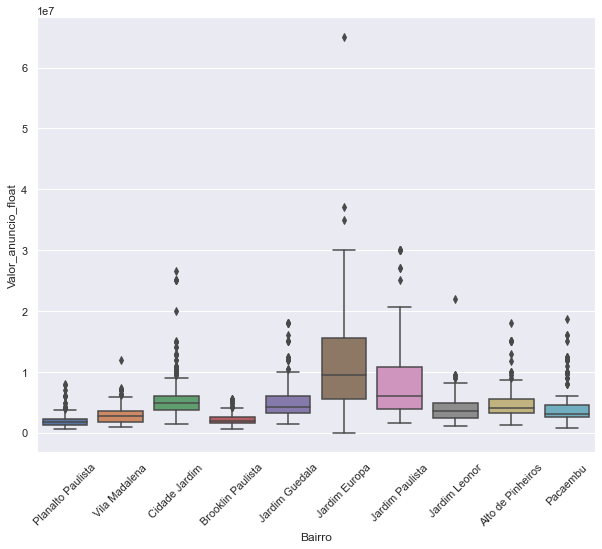

In [30]:
plt.figure(figsize=(10, 8))
ax= sns.boxplot(data= dados_vendas.query('Bairro in @top_bairros'), x="Bairro", y="Valor_anuncio_float")
ax.tick_params(axis='x', rotation=45)
plt.show()


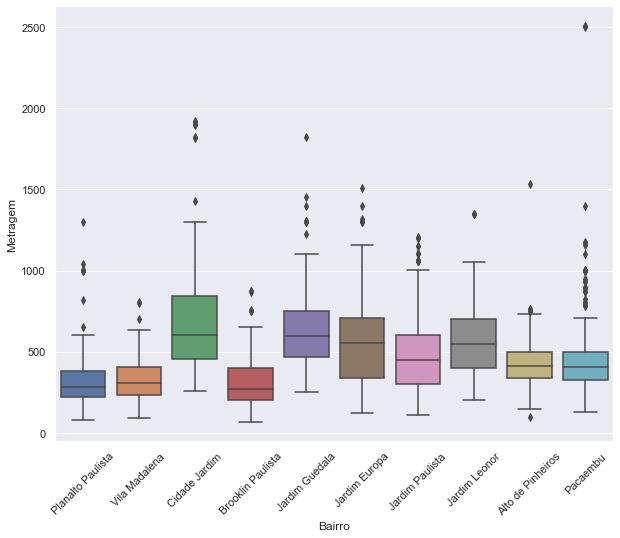

In [31]:
plt.figure(figsize=(10, 8))
ax= sns.boxplot(data= dados_vendas.query('Bairro in @top_bairros and Metragem < 30000'), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()


In [32]:
#DESAFIO AULA 03
# -Tentar vincular dados do IBGE com os dados de imóveis.
# -Tratar os outliers e comparar os resultados.
# -Agrupar por mais de uma categoria e realizar as análises.

In [33]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
dados_ibge =  pd.read_csv(ibge_url, encoding = 'UTF-8', sep = ';', decimal=',')
print(dados_ibge.shape)
dados_ibge.head()

(18363, 34)


,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.32,2091.32,8.53e+06,2164.55,8.67e+06,1227.41,4.29e+06,1713.75,5.15e+06,NaN
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.09,1650.09,3.98e+06,1717.44,4.03e+06,1045.78,2.57e+06,1468.08,2.99e+06,NaN
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.08,1280.43,5.47e+06,2349.53,7.55e+06,902.97,2.74e+06,1786.79,3.84e+06,NaN
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.26,1119.59,3.57e+06,1859.13,4.57e+06,869.09,2.12e+06,1567.41,2.74e+06,NaN
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.35,1416.90,2.24e+06,1581.66,2.24e+06,917.71,1.57e+06,1356.35,1.73e+06,NaN


In [34]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regi�es  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

In [35]:
dados_ibge["Nome_do_distrito"].unique()

array(['�GUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BEL�M', 'BOM RETIRO',
       'BR�S', 'BRASIL�NDIA', 'BUTANT�', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAP�O REDONDO', 'CARR�O', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLA��O',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO �', 'GRAJA�',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JA�AN�', 'JAGUARA',
       'JAGUAR�', 'JARAGU�', 'JARDIM �NGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM S�O LU�S', 'JOS� BONIF�CIO', 'LAPA',
       'LIBERDADE', 'LIM�O', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REP�BLICA

In [36]:
dados_ibge = dados_ibge.replace('Nome_do_distrito')

In [37]:
dados_bairro["Bairro"] = dados_bairro["Bairro"].str.upper()

dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,m_quad,Valor_m2_bairro
0,ACLIMAÇÃO,19447,258,240,230,1.39e+08,6.05e+05,7162.69
1,ALTO DA BOA VISTA,3351,33,41,37,1.91e+07,4.68e+04,5708.74
2,ALTO DA LAPA,23940,252,308,320,1.67e+08,6.09e+05,6961.30
3,ALTO DA MOOCA,5401,66,52,73,2.37e+07,1.14e+05,4385.00
4,ALTO DE PINHEIROS,158616,1453,1782,1827,1.76e+09,4.16e+06,11126.34
...,...,...,...,...,...,...,...,...
692,VILA ÁGUA FUNDA,761,13,11,13,3.26e+06,2.23e+04,4283.84
693,ÁGUA BRANCA,2083,37,39,27,1.47e+07,8.72e+04,7065.77
694,ÁGUA FRIA,1985,34,41,30,1.11e+07,7.01e+04,5604.53
695,ÁGUA FUNDA,278,6,5,4,1.09e+06,7.75e+03,3920.86


In [38]:
ibge_bairros = dados_ibge.groupby("Nome_do_distrito").mean().reset_index()

ibge_bairros.rename({'Nome_do_distrito': 'Bairro'}, axis = 1, inplace = True)

ibge_bairros

,Bairro,Cod_setor,Cod_Grandes Regi�es,Cod_UF,Cod_meso,Cod_micro,Cod_RM,Cod_municipio,Cod_distrito,Cod_subdistrito,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,ALTO DE PINHEIROS,3.55e+14,3.0,35.0,3515.0,35061.0,20.0,3.55e+06,3.55e+08,3.55e+10,...,1.76,7512.90,1.57e+08,8412.86,1.67e+08,4309.55,7.81e+07,6181.14,9.83e+07,NaN
1,ANHANGUERA,3.55e+14,3.0,35.0,3515.0,35061.0,20.0,3.55e+06,3.55e+08,3.55e+10,...,2.38,983.74,9.36e+05,1135.90,9.03e+05,600.48,6.69e+05,992.65,6.79e+05,NaN
2,ARICANDUVA,3.55e+14,3.0,35.0,3515.0,35061.0,20.0,3.55e+06,3.55e+08,3.55e+10,...,2.39,1312.31,2.73e+06,1534.69,2.80e+06,883.29,2.07e+06,1337.44,2.43e+06,NaN
3,ARTUR ALVIM,3.55e+14,3.0,35.0,3515.0,35061.0,20.0,3.55e+06,3.55e+08,3.55e+10,...,2.26,1267.56,1.45e+06,1424.76,1.43e+06,853.14,1.09e+06,1248.47,1.09e+06,NaN
4,BARRA FUNDA,3.55e+14,3.0,35.0,3515.0,35061.0,20.0,3.55e+06,3.55e+08,3.55e+10,...,1.71,3629.43,2.42e+07,4142.98,2.61e+07,2744.02,2.06e+07,3641.36,2.40e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,VILA MATILDE,3.55e+14,3.0,35.0,3515.0,35061.0,20.0,3.55e+06,3.55e+08,3.55e+10,...,2.33,1661.45,4.79e+06,1928.38,5.17e+06,1119.36,4.96e+06,1644.71,6.37e+06,NaN
92,VILA MEDEIROS,3.55e+14,3.0,35.0,3515.0,35061.0,20.0,3.55e+06,3.55e+08,3.55e+10,...,2.78,1172.58,2.06e+06,1430.31,2.18e+06,816.22,1.33e+06,1246.37,1.48e+06,NaN
93,VILA PRUDENTE,3.55e+14,3.0,35.0,3515.0,35061.0,20.0,3.55e+06,3.55e+08,3.55e+10,...,1.98,2171.72,1.08e+07,2470.10,1.11e+07,1403.89,6.43e+06,2052.70,7.56e+06,NaN
94,VILA S�NIA,3.55e+14,3.0,35.0,3515.0,35061.0,20.0,3.55e+06,3.55e+08,3.55e+10,...,2.05,3320.56,2.42e+07,3779.61,2.54e+07,2150.75,1.67e+07,3103.80,2.14e+07,NaN


In [39]:
len(dados_ibge["Nome_do_distrito"].unique())

96

In [40]:
len(dados_bairro["Bairro"].unique())

697

In [41]:
len(dados_bairro["Bairro"].unique())

697

In [42]:
dados_combinados = pd.merge(dados_bairro, ibge_bairros, how = 'inner', on = 'Bairro')

dados_combinados.head()

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,m_quad,Valor_m2_bairro,Cod_setor,Cod_Grandes Regi�es,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,ALTO DE PINHEIROS,158616,1453,1782,1827,1.76e+09,4.16e+06,11126.34,3.55e+14,3.0,...,1.76,7512.90,1.57e+08,8412.86,1.67e+08,4309.55,7.81e+07,6181.14,9.83e+07,NaN
1,ARICANDUVA,278,3,3,2,4.80e+05,1.73e+03,1726.62,3.55e+14,3.0,...,2.39,1312.31,2.73e+06,1534.69,2.80e+06,883.29,2.07e+06,1337.44,2.43e+06,NaN
2,BARRA FUNDA,2438,45,43,25,1.38e+07,1.11e+05,5675.14,3.55e+14,3.0,...,1.71,3629.43,2.42e+07,4142.98,2.61e+07,2744.02,2.06e+07,3641.36,2.40e+07,NaN
3,BELA VISTA,190,3,2,1,9.60e+05,5.05e+03,5052.63,3.55e+14,3.0,...,1.79,3802.59,3.61e+07,4150.94,3.74e+07,2777.62,3.81e+07,3477.69,4.39e+07,NaN
4,BOM RETIRO,673,6,4,4,3.00e+06,8.92e+03,4457.65,3.55e+14,3.0,...,2.84,1648.11,4.21e+06,2010.42,4.63e+06,1171.86,5.30e+06,1749.16,6.40e+06,NaN


In [43]:
dados_combinados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bairro               41 non-null     object 
 1   Metragem             41 non-null     int64  
 2   Quartos              41 non-null     int64  
 3   Banheiros            41 non-null     int64  
 4   Vagas                41 non-null     int64  
 5   Valor_anuncio_float  41 non-null     float64
 6   m_quad               41 non-null     float64
 7   Valor_m2_bairro      41 non-null     float64
 8   Cod_setor            41 non-null     float64
 9   Cod_Grandes Regi�es  41 non-null     float64
 10  Cod_UF               41 non-null     float64
 11  Cod_meso             41 non-null     float64
 12  Cod_micro            41 non-null     float64
 13  Cod_RM               41 non-null     float64
 14  Cod_municipio        41 non-null     float64
 15  Cod_distrito         41 non-null     float

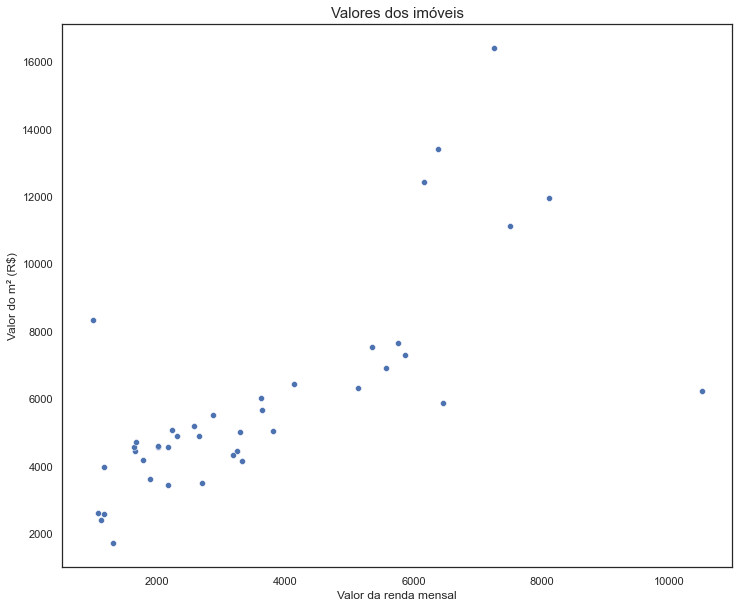

In [47]:
plt.figure(figsize=(12, 10))

sns.set_style("white")

ax = sns.scatterplot(data = dados_combinados, x= 'V005', y="Valor_m2_bairro")

ax.set_title("Valores dos imóveis", size = 15)
ax.set_xlabel( "Valor da renda mensal", size = 12 )
ax.set_ylabel( "Valor do m² (R$)" , size = 12 )

plt.ticklabel_format(style='plain', axis='y')

plt.ticklabel_format(style='plain', axis='x')



